## Test of Pytorch


In [2]:
import torch
torch.__version__
torch.__path__

['/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torch']

In [3]:
x=torch.tensor([[1,2,3],[4,5,6],[7,8,9]],dtype=torch.float32)
print(x)
print(x.size())



tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])
torch.Size([3, 3])


In [4]:
x=torch.randn(4,4)  
y=x.view(16)
z=x.view(-1,8)
print(x.size(),y.size(),z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


Using matplotlib backend: module://matplotlib_inline.backend_inline
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


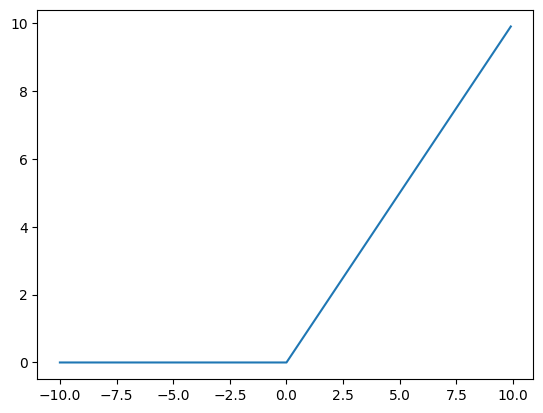

In [11]:
%pylab
import torch.nn as nn

x=torch.arange(-10,10,0.1)
plot(x.numpy(),torch.nn.functional.relu(x).numpy())


In [19]:
v=torch.arange(0,6).view(2,3)
v[0][2]
v[1].fill_(2)

tensor([2, 2, 2])

In [28]:
a=torch.ones(2,5,dtype=torch.float64)
b=a.numpy()

a=np.ones((2,5),dtype=np.int32)
b=torch.from_numpy(a)
np.add(a,1,out=a)
b

tensor([[2, 2, 2, 2, 2],
        [2, 2, 2, 2, 2]], dtype=torch.int32)

In [30]:
x=torch.ones(2,2,requires_grad=True)
y=2*(x**3)
z=y.sum()
z.backward(retain_graph=True)
print(x.grad)


tensor([[6., 6.],
        [6., 6.]])


In [31]:
z.backward(retain_graph=True)
print(x.grad)

tensor([[12., 12.],
        [12., 12.]])


In [35]:
import torch.nn

model=torch.nn.Linear(in_features=64,out_features=1,bias=True)

x=torch.rand(100,64)
hat_y=model(x)

print(hat_y.size())


torch.Size([100, 1])


In [36]:
print(model.__dict__)


{'training': True, '_parameters': OrderedDict([('weight', Parameter containing:
tensor([[-0.0400, -0.1201, -0.1079, -0.1127,  0.1185, -0.0766,  0.0450, -0.1197,
         -0.0269, -0.0465, -0.0831, -0.0847, -0.0218, -0.0240, -0.1098,  0.0341,
         -0.0061,  0.0746, -0.0997, -0.0194, -0.0859,  0.0087, -0.0723,  0.0732,
          0.0967, -0.0965, -0.1217,  0.0360,  0.0748, -0.0880,  0.0800, -0.0331,
          0.0685,  0.0769,  0.0786, -0.0409,  0.0854,  0.0850, -0.0813, -0.1122,
         -0.0249, -0.0516, -0.0575,  0.0765,  0.1151, -0.0952,  0.0735,  0.0920,
          0.0548, -0.0478,  0.1198, -0.0682, -0.0967, -0.0022,  0.0116,  0.1044,
         -0.0205, -0.0987,  0.0741,  0.0644,  0.0801, -0.1043, -0.0101, -0.0253]],
       requires_grad=True)), ('bias', Parameter containing:
tensor([-0.0414], requires_grad=True))]), '_buffers': OrderedDict(), '_non_persistent_buffers_set': set(), '_backward_pre_hooks': OrderedDict(), '_backward_hooks': OrderedDict(), '_is_full_backward_hook': None,

In [37]:
print(model.weight)

Parameter containing:
tensor([[-0.0400, -0.1201, -0.1079, -0.1127,  0.1185, -0.0766,  0.0450, -0.1197,
         -0.0269, -0.0465, -0.0831, -0.0847, -0.0218, -0.0240, -0.1098,  0.0341,
         -0.0061,  0.0746, -0.0997, -0.0194, -0.0859,  0.0087, -0.0723,  0.0732,
          0.0967, -0.0965, -0.1217,  0.0360,  0.0748, -0.0880,  0.0800, -0.0331,
          0.0685,  0.0769,  0.0786, -0.0409,  0.0854,  0.0850, -0.0813, -0.1122,
         -0.0249, -0.0516, -0.0575,  0.0765,  0.1151, -0.0952,  0.0735,  0.0920,
          0.0548, -0.0478,  0.1198, -0.0682, -0.0967, -0.0022,  0.0116,  0.1044,
         -0.0205, -0.0987,  0.0741,  0.0644,  0.0801, -0.1043, -0.0101, -0.0253]],
       requires_grad=True)


In [38]:
print(model.bias)

Parameter containing:
tensor([-0.0414], requires_grad=True)


In [39]:
dtype = torch.float
device = torch.device("cpu")
N, D_in, H, D_out = 64, 1000, 100, 10
x = torch.randn(N, D_in, device=device, dtype=dtype)
y = torch.randn(N, D_out, device=device, dtype=dtype)
w1 = torch.randn(D_in, H, device=device, dtype=dtype)
w2 = torch.randn(H, D_out, device=device, dtype=dtype)
learning_rate = 1e-6
for t in range(500):
    # --- forward
    h = x.mm(w1)
    h_relu = h.clamp(min=0)
    y_pred = h_relu.mm(w2)
    # --- loss
    loss = (y_pred - y).pow(2).sum().item()
    # --- backward
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.t().mm(grad_y_pred)
    grad_h_relu = grad_y_pred.mm(w2.t())
    grad_h = grad_h_relu.clone()
    grad_h[h < 0] = 0
    grad_w1 = x.t().mm(grad_h)
    # --- update
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2